# Assignment 2: Logistic Regression

## Introduction

In this assignment, you will implement logistic regression and apply it to two different datasets. 

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting. In this assignment, we will also use [`scipy`](https://docs.scipy.org/doc/scipy/reference/), which contains scientific and numerical computation functions and tools. 

As we proceed in the course, you will exposed more libraries that are relevant for Machine Learning and Deep Learning

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
import seaborn as sns
sns.set()

# Optimization module in scipy
from scipy import optimize


# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading


After completing each part of the assignment, be sure to submit your solutions to the grader. The following is a breakdown of how each part of this exercise is scored.


| Section | Part                                 | Submission function   | Points 
| :-      |:-                                    | :-                    | :-:
| 1       | [Sigmoid Function](#section1)                   | [`sigmoid`](#sigmoid) | 5      
| 2       | [Compute cost for logistic regression](#section2) | [`costFunction`](#costFunction) | 30     
| 3       | [Gradient for logistic regression](#section2)     | [`costFunction`](#costFunction) | 30     
| 4       | [Predict Function](#section4)                     | [`predict`](#predict) | 5      
| 5       | [Compute cost for regularized LR](#section5)      | [`costFunctionReg`](#costFunctionReg) | 15     
| 6       | [Gradient for regularized LR](#section5)          | [`costFunctionReg`](#costFunctionReg) | 15     
|         | Total Points                         | | 100    

## 1 Logistic Regression

In this part of the assignment, you will build a logistic regression model to predict whether a person gets diabetes or not. Suppose that you are the health care practioner and want to determine if your patient will have an onset of diabetes or not. You have historical data from previous patients that you can use as a training set for logistic regression. For each training example, you have the applicant’s parameters and their onset of diabetes. Your task is to build a classification model that estimates an patients’s probability of getting diabetes based the parameters. 

The following cell will load the data and corresponding labels:

#### Dataset Description
Fields description follow:
* preg = Number of times pregnant
* plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* pres = Diastolic blood pressure (mm Hg)
* skin = Triceps skin fold thickness (mm)
* test = 2-Hour serum insulin (mu U/ml)
* mass = Body mass index (weight in kg/(height in m)^2)
* pedi = Diabetes pedigree function
* age = Age (years)
* class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [5]:
# Load data
# The first eight columns contains the parameters and the ninth column
# contains the label.
import csv
from google.colab import files 
uploaded = files.upload()

Saving input.csv to input.csv


In [6]:

data = np.genfromtxt('input.csv' , delimiter=',')
X = data[:,0:7]
# X contains all the variables (
# * preg
# * plas
# * pres 
# * skin 
# * test 
# * mass 
# * pedi 
# * age 
# )
Y = data[:, 8]
# Y contains the class(i.e if patient has diabetes: 1 or not: 0)

### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. We  display the data on a 2-dimensional plot by calling the function `plotData`. You will now complete the code in `plotData` so that it displays a figure where the axes are any two features or parameters of the patients, and the positive and negative examples are shown with different markers.

To help you get more familiar with plotting, we have left `plotData` empty so you can try to implement it yourself. However, this is an optional (ungraded) exercise. 

```python
# Find Indices of Positive and Negative Examples
pos = y == 1
neg = y == 0

# Plot Examples
pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
```

In [7]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    # Find Indices of Positive and Negative Examples

    fig = pyplot.figure()
    pyplot.plot(X, Y)
    # pyplot.scatter(X[0][],Y)

Now, we call the implemented function to display the loaded data:

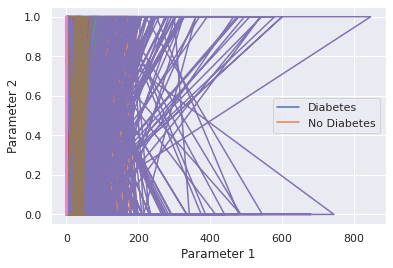

In [8]:
plotData(X, Y)
# add axes labels
pyplot.xlabel('Parameter 1')
pyplot.ylabel('Parameter 2')
pyplot.legend(['Diabetes', 'No Diabetes'])
pass

<a id="section1"></a>
### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

Your first step is to implement this function `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**
<a id="sigmoid"></a>

In [9]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """

    
    # convert input to a numpy array
    z = np.array(z)
    
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    sigmval = 1/(1 + np.exp(-z))
    return sigmval

The following cell evaluates the sigmoid function at `z=0`. You should get a value of 0.5. You can also try different values for `z` to experiment with the sigmoid function.

In [10]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


<a id="section2"></a>
#### 1.2.2 Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Before proceeding we add the intercept term to X. 

In [11]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Now, complete the code for the function `costFunction` to return the cost and gradient. Recall that the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
<a id="costFunction"></a>

In [12]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : array_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.

    """

    J = (1/m) * np.sum(-Y * np.log(sigmoid(np.dot(X,theta)))- ((1-Y)*np.log(1-sigmoid(np.dot(X,theta)))))
    #grad =(1/m) *  (X.T @ (sigmoid(np.dot(X,theta)) - Y))
    grad =(1/m) * np.matmul( X.T,sigmoid(np.dot(X,theta)) - Y)
    return J , grad



Once you are done call your `costFunction` using two test cases for  $\theta$ by executing the next cell.

In [13]:
# Initialize fitting parameters that are theta in this case, simple way is to start with 0 as a value for all
# costFunction(0,X,Y)
# Compute and display cost and gradient with non-zero theta by providing some non-zero values as input to show the output of cost and gradient
theta = np.zeros(X.shape[1])

J, grad = costFunction(theta, X, Y)
print("Gradient = ", str(grad))
print("Theta = " , str(theta))
print("cost function = " , J)



Gradient =  [ 0.15104167  0.22460938 11.15429688  9.83789062  2.53385417  4.88671875
  3.73300781  0.04383659]
Theta =  [0. 0. 0. 0. 0. 0. 0. 0.]
cost function =  0.6931471805599452


#### 1.2.3 Learning parameters using `scipy.optimize`

In the previous assign,ent, you found the optimal parameters of a linear regression model by implementing gradient descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy is a numerical computing library for `python`. It provides an optimization module for root finding and minimization. As of `scipy 1.0`, the function `scipy.optimize.minimize` is the method to use for optimization problems(both constrained and unconstrained).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:
- `costFunction`: A cost function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y). It is important to note that we only pass the name of the function without the parenthesis. This indicates that we are only providing a reference to this function, and not evaluating the result from this function.
- `initial_theta`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
- `method`: Optimization method/algorithm to use
- `options`: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

If you have completed the `costFunction` correctly, `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object. Notice that by using `optimize.minimize`, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by `optimize.minimize`: you only needed to provide a function calculating the cost and the gradient.

In the following, we already have code written to call `optimize.minimize` with the correct arguments.

In [14]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
initial_theta = theta
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, Y),
                        jac=True,
                        method='TNC',
                        options=options)


# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res
print(cost)
theta = res.x


# the optimized theta is in the x property


# Print theta  and expected theta to screen
print(theta)
print(res.x)

     fun: 0.4726351608578022
     jac: array([ 9.61073324e-06,  1.07894948e-05, -2.30805886e-07,  9.03293829e-06,
       -1.05195126e-04,  5.33564584e-06,  2.81989689e-05,  1.41617504e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 59
     nit: 12
  status: 1
 success: True
       x: array([-8.17032801e+00,  1.48435497e-01,  3.63402792e-02, -1.18267450e-02,
       -3.78574140e-04, -1.27723257e-03,  8.80236382e-02,  9.67299033e-01])
[-8.17032801e+00  1.48435497e-01  3.63402792e-02 -1.18267450e-02
 -3.78574140e-04 -1.27723257e-03  8.80236382e-02  9.67299033e-01]
[-8.17032801e+00  1.48435497e-01  3.63402792e-02 -1.18267450e-02
 -3.78574140e-04 -1.27723257e-03  8.80236382e-02  9.67299033e-01]


Once `optimize.minimize` completes, we want to use the final value for $\theta$ to visualize the decision boundary.

<a id="section4"></a>
#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular patient willget biabetes or not. One way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in function `predict`. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$. 
<a id="predict"></a>

In [15]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples
    predicted = np.round(sigmoid(np.dot(X,theta)))

    predicted_class =[1 if i > 0.5 else 0 for i in predicted]
    return predicted_class

After you have completed the code in `predict`, we proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [16]:
#  Predict probability for a patient with a set of parameters 
print(theta)
prob = sigmoid(np.dot(X, theta))
p = predict(theta, X)

# Compute accuracy on our training set
yes = 0
no = 0
for x in range(len(p)):
  if (p[x] == Y[x]):
    yes += 1
  else:
    no += 1 
acc = (yes * 100)/768
print("accuracy=",acc)




[-8.17032801e+00  1.48435497e-01  3.63402792e-02 -1.18267450e-02
 -3.78574140e-04 -1.27723257e-03  8.80236382e-02  9.67299033e-01]
accuracy= 77.60416666666667


## 2 Regularized logistic regression

In this part of the assignment, you will implement regularized logistic regression to predict whether patients with a certain set of parameters get diabetes or not.The goal is to compare the performance of logistic regression with regularized logistic regression.


### 2.2 Feature mapping

One way to fit the data better is to create more features from each data point. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.


<a id="section5"></a>
### 2.3 Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function `costFunctionReg` below to return the cost and gradient.

Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
<a id="costFunctionReg"></a>

In [17]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    J = ((1/m) * np.sum(-Y * np.log(sigmoid(np.dot(X,theta)))- ((1-Y)*np.log(1-sigmoid(np.dot(X,theta))))))
    + ((lambda_/2*m) * np.sum(theta * theta))
    
    for j in range(m):
      if j == 0 :
        grad =((1/m) * np.matmul( X.T,sigmoid(np.dot(X,theta)) - Y))
      if j >=1:
        grad =((1/m) * np.matmul( X.T,sigmoid(np.dot(X,theta)) - Y)) + ((lambda_ / m)*theta)

    return J,grad



Once you are done with the `costFunctionReg`, we call it below using the initial value of $\theta$ (initialized to all zeros), and also another test case where $\theta$ is all ones.

In [18]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, Y, lambda_)


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, Y, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in multiply


#### 2.3.1 Learning parameters using `scipy.optimize.minimize`

Similar to the previous parts, you will use `optimize.minimize` to learn the optimal parameters $\theta$. If you have completed the cost and gradient for regularized logistic regression (`costFunctionReg`) correctly, you should be able to step through the next part of to learn the parameters $\theta$ using `optimize.minimize`.

### 2.4 Optional (ungraded) exercises

In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting.

Notice the changes in the decision boundary as you vary $\lambda$. With a small
$\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data. See the following figures for the decision boundaries you should get for different values of $\lambda$. 


In [ ]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, Y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

# Compute accuracy on our training set
p = predict(theta, X)

#Print the results

*You do not need to submit any solutions for these optional (ungraded) exercises.*